#### Automobile Insurance Claim Prediction 

In [1]:
import pandas as pd
import numpy as np
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('data/fraud_insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
df.shape

(1000, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

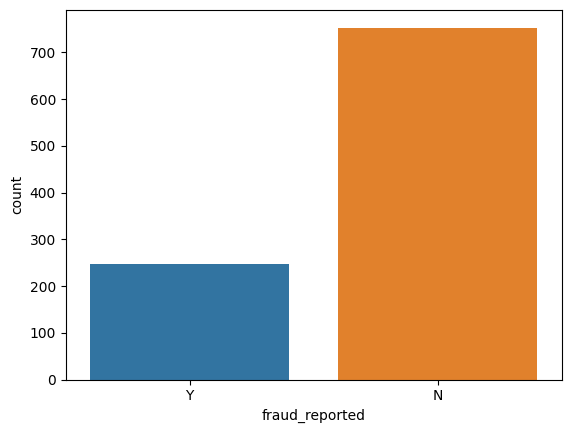

In [6]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

From the bar chart above, the data is inbalanced

In [7]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

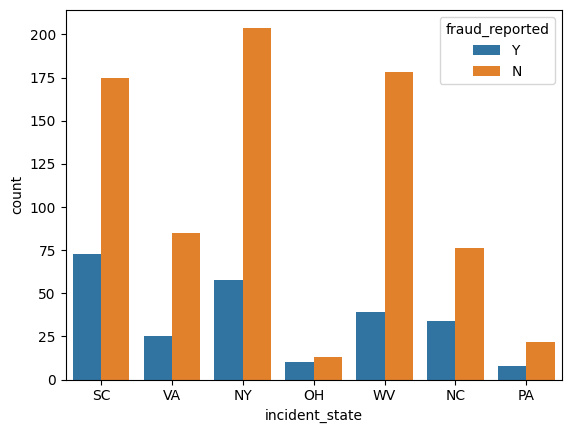

In [8]:
sns.countplot(x='incident_state', data=df, hue='fraud_reported')

<Axes: xlabel='policy_state', ylabel='count'>

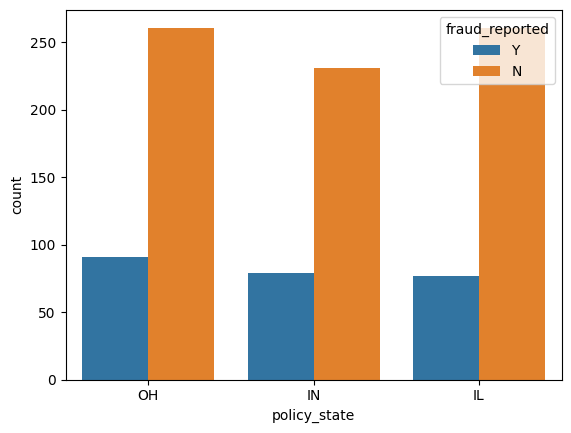

In [9]:
sns.countplot(x='policy_state', data=df, hue='fraud_reported')

<Axes: xlabel='incident_type', ylabel='count'>

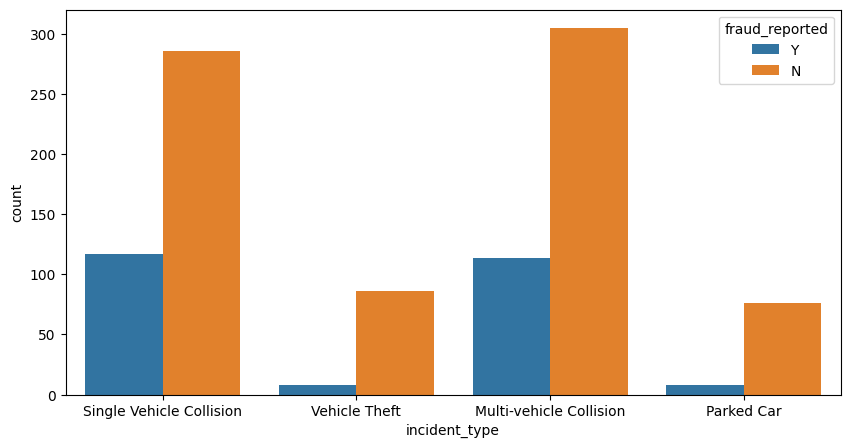

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_type', data=df, hue='fraud_reported')

<Axes: xlabel='insured_sex', ylabel='count'>

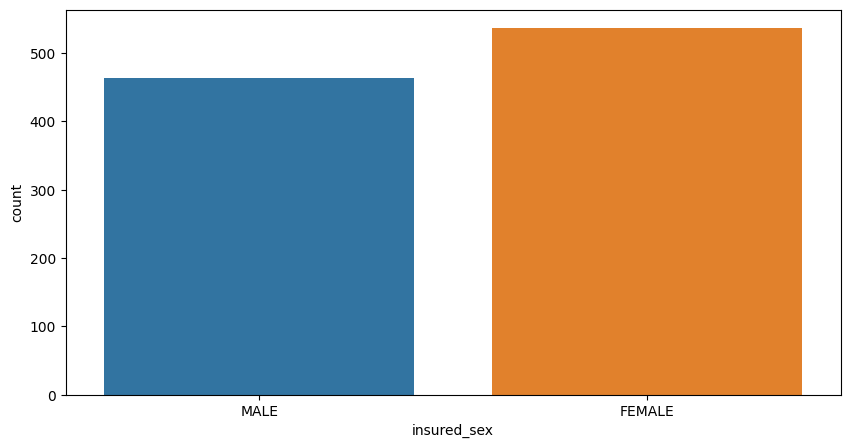

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='insured_sex', data=df, hue='insured_sex')

<Axes: xlabel='insured_relationship', ylabel='count'>

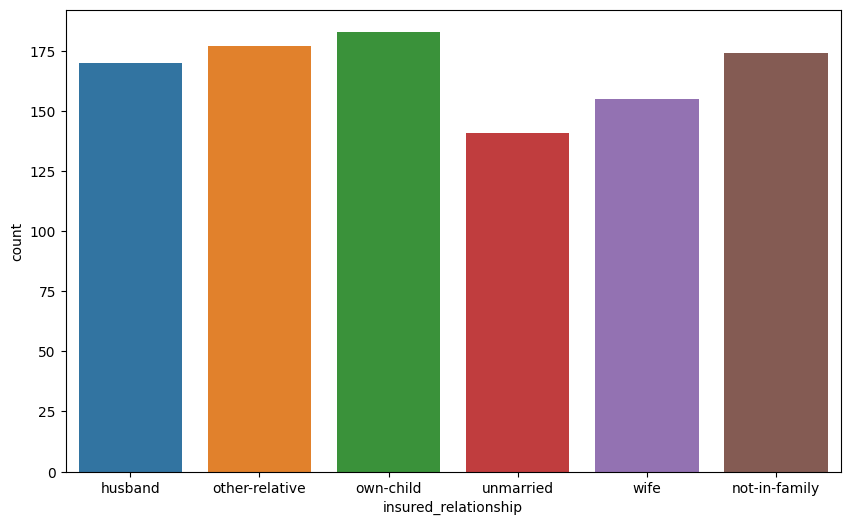

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='insured_relationship', data=df, hue='insured_relationship')

In [13]:
df.police_report_available.value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [14]:
df.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [15]:
df.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [16]:
df.replace('?', np.nan, inplace=True)

In [17]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [18]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [19]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
#columns to encode
cols = ['insured_sex', 'insured_relationship', 'incident_type', 'policy_state', 'insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship','collision_type', 
        'incident_severity', 'authorities_contacted', 'incident_state','incident_city', 'incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported'
        ]

def encode_categorical_columns(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print(f"Column '{column}' not in the Dataframe.")
    return df

df = encode_categorical_columns(df,cols)

In [22]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,2,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25 00:00:00,2,2,0,3,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27 00:00:00,1,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21 00:00:00,3,1,1,3,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06 00:00:00,2,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22 00:00:00,0,1,1,3,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25 00:00:00,0,250/500,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-01-10 00:00:00,2,0,0,3,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06 00:00:00,0,500/1000,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17 00:00:00,3,1,1,4,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


In [23]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [24]:
features = ['vehicle_claim','property_claim', 'injury_claim','umbrella_limit', 'number_of_vehicles_involved','bodily_injuries','policy_state',
            'insured_sex','months_as_customer', 'insured_relationship', 'total_claim_amount', 'insured_relationship']

In [25]:
X = df[features]
y = df.fraud_reported

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [28]:
y_train.value_counts()

fraud_reported
0    565
1    185
Name: count, dtype: int64

In [29]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([565, 565])

In [30]:
from xgboost import XGBClassifier 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std 


In [31]:
#Stacking the ensemble models 
def stacked_models():
    #define the base models
    level0 = list ()
    level0.append(('DT', DecisionTreeClassifier(max_depth=10, random_state=5)))
    level0.append(('RF', RandomForestClassifier(n_estimators=500)))
    level1 = LogisticRegression()
#define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model


#get a list of models to evaluate
def get_models():
    models = dict()
    models['DT'] = DecisionTreeClassifier(max_depth=10)
    models['RF'] = RandomForestClassifier(n_estimators=500)
    models['KNN'] = KNeighborsClassifier(5)
    models['Stacking'] = stacked_models()
    return models

#get the models to evaluate 
models = get_models()

def evaluate_model(model, X,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#evaluate the models and save the results 
result, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    result.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))


>DT 0.68 (0.04)
>RF 0.77 (0.04)
>KNN 0.67 (0.05)
>Stacking 0.78 (0.03)


C:\Users\David\AppData\Local\Temp\ipykernel_40248\3580465255.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result, labels=names, showmeans=True)


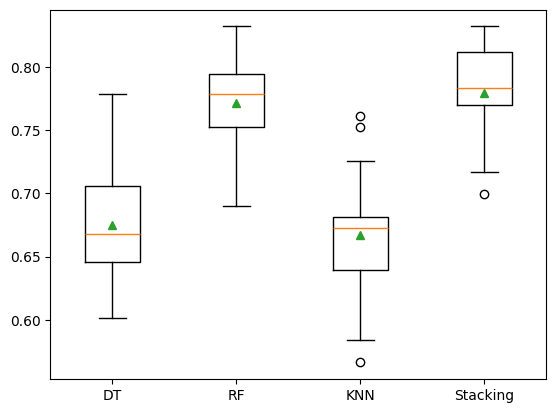

In [32]:
plt.boxplot(result, labels=names, showmeans=True)
plt.show()

In [33]:
import pickle 
pickle.dump(model, open("insurance_model.pkl", "wb"))